In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy

In [2]:
file_path = "new_speeches_output.csv"
df = pd.read_csv(file_path)
text_verbal_interjections_df = df[(df['Verbal interjection'] > 0) & (df['Paragraph'].str.len() > 0)]
text_verbal_interjections_df

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Paragraph,Interjection,Interjector,Interjector Gender,Interjector Party,Verbal interjection,Nonverbal interjection,Interjection type
21,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,8,Carsten Schneider,mp,männlich,SPD,Was?,True,Katrin Göring-Eckardt,weiblich,GRUENE,True,False,Zuruf
34,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,13,Carsten Schneider,mp,männlich,SPD,Oh!,True,Unknown,NaN,CDU/CSU,True,False,Zuruf
36,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,14,Carsten Schneider,mp,männlich,SPD,Warum habt ihr das bei Gerhard Schröder nicht ...,True,Volker Kauder,männlich,CDU/CSU,True,False,Zuruf
52,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,2,3,Bernd Baumann,mp,männlich,AfD,Mir kommen die Tränen!,True,Unknown,NaN,FDP,True,False,Zuruf
55,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,2,4,Bernd Baumann,mp,männlich,AfD,Zur Sache!,True,Unknown,NaN,FDP,True,False,Zuruf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550687,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33055,1,Andreas Jung,mp,männlich,CDU/CSU,"Danke, SPD!",True,René Röspel,männlich,SPD,True,False,Zuruf
550703,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,4,Götz Frömming,mp,männlich,AfD,"Das ist ein Rechtsanspruch! Wer nicht will, mu...",True,Christine Lambrecht,weiblich,SPD,True,False,Zuruf
550706,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,5,Götz Frömming,mp,männlich,AfD,Das stimmt nicht!,True,Dr. Silke Launert,weiblich,CDU/CSU,True,False,Zuruf
550713,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,10,Götz Frömming,mp,männlich,AfD,Die Mütter werden im Stich gelassen!,True,Dr. Silke Launert,weiblich,CDU/CSU,True,False,Zuruf


In [3]:
nlp = spacy.load("de_core_news_sm", disable=["ner", "lemmatizer", "transformer"])

In [4]:
# check if following speech act is interjection
df['next_verbal_interjection'] = df['Verbal interjection'].shift(-1, fill_value=False)
df['next_nonverbal_interjection'] = df['Nonverbal interjection'].shift(-1, fill_value=False)

In [5]:
last_5_filenames = text_verbal_interjections_df['Filename'].drop_duplicates().tail()

In [6]:
text_verbal_interjections_df = text_verbal_interjections_df[text_verbal_interjections_df['Filename'].isin(last_5_filenames)]

In [7]:
text_verbal_interjections_df

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Paragraph,Interjection,Interjector,Interjector Gender,Interjector Party,Verbal interjection,Nonverbal interjection,Interjection type
540270,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32492,1,Armin-Paulus Hampel,mp,männlich,AfD,"Gut, dass das die letzte Rede ist!",True,Britta Haßelmann,weiblich,GRUENE,True,False,Zuruf
540313,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32495,13,Dietmar Bartsch,mp,männlich,DIE LINKE,Märchenstunde!,True,Armin-Paulus Hampel,männlich,AfD,True,False,Zuruf
540327,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32496,1,Omid Nouripour,mp,männlich,GRUENE,Sehr richtig!,True,Alexander Graf Lambsdorff,männlich,FDP,True,False,Zuruf
540328,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32496,1,Omid Nouripour,mp,männlich,GRUENE,Das werden wir bald sehen!,True,Heike Hänsel,weiblich,DIE LINKE,True,False,Zuruf
540359,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32497,1,Rüdiger Lucassen,mp,männlich,AfD,Das sagt der Richtige!,True,Dr. Nils Schmid,männlich,SPD,True,False,Zuruf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550687,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33055,1,Andreas Jung,mp,männlich,CDU/CSU,"Danke, SPD!",True,René Röspel,männlich,SPD,True,False,Zuruf
550703,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,4,Götz Frömming,mp,männlich,AfD,"Das ist ein Rechtsanspruch! Wer nicht will, mu...",True,Christine Lambrecht,weiblich,SPD,True,False,Zuruf
550706,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,5,Götz Frömming,mp,männlich,AfD,Das stimmt nicht!,True,Dr. Silke Launert,weiblich,CDU/CSU,True,False,Zuruf
550713,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,10,Götz Frömming,mp,männlich,AfD,Die Mütter werden im Stich gelassen!,True,Dr. Silke Launert,weiblich,CDU/CSU,True,False,Zuruf


In [3]:
results = "predictions/predictions_interjections_set.csv"
results_df = pd.read_csv(results)

results_speeches = "predictions_speech_set.csv"
result_speeches_df = pd.read_csv(results_speeches)

In [8]:
def preprocess_text_BERT(text):
    '''Tokenize for BERT input, return list of strings'''
    doc = nlp(text)
    return [token.text for token in doc]

def spacy_sent_tokenize(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

def preprocess_utterances_BERT_with_ids(text):
    """
    Tokenize for BERT input and return a list of tuples containing
    the utterance and its corresponding ID within the paragraph.
    """
    utterances = spacy_sent_tokenize(text)
    utterance_ids = list(range(len(utterances)))
    return list(zip(utterance_ids, utterances))


def sentence_tokenize_tags(text):
    '''Tokenize for BERT input, encode first token of sentence with "B", rest with "I".'''
    sentence_list = spacy_sent_tokenize(text)
    tag_list = []

    for sentence in sentence_list:
        tokens = [token.text for token in nlp(sentence)]
        if tokens:
            tag_list.append("B")
            tag_list.extend(["I"] * (len(tokens) - 1))

    return tag_list

In [9]:

text_verbal_interjections_df["utterance_with_id"] = text_verbal_interjections_df["Paragraph"].apply(preprocess_utterances_BERT_with_ids)

text_verbal_interjections_df = text_verbal_interjections_df.explode("utterance_with_id")

text_verbal_interjections_df["utterance_id"], text_verbal_interjections_df["utterance"] = zip(*text_verbal_interjections_df["utterance_with_id"])

text_verbal_interjections_df.drop(columns=["utterance_with_id"], inplace=True)

text_verbal_interjections_df = text_verbal_interjections_df.explode('utterance', ignore_index=True)
text_verbal_interjections_df.loc[:, "token_list"] = text_verbal_interjections_df["Paragraph"].apply(preprocess_text_BERT)
text_verbal_interjections_df.loc[:, "utterance_token_list"] = text_verbal_interjections_df["utterance"].apply(preprocess_text_BERT)
text_verbal_interjections_df.loc[:, "gold_segmentation_list"] = text_verbal_interjections_df["Paragraph"].apply(sentence_tokenize_tags)

C:\Users\hanna\AppData\Local\Temp\ipykernel_23772\2205809410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_verbal_interjections_df["utterance_with_id"] = text_verbal_interjections_df["Paragraph"].apply(preprocess_utterances_BERT_with_ids)


In [10]:
text_verbal_interjections_df

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Interjector Gender,Interjector Party,Verbal interjection,Nonverbal interjection,Interjection type,utterance_id,utterance,token_list,utterance_token_list,gold_segmentation_list
0,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32492,1,Armin-Paulus Hampel,mp,männlich,AfD,...,weiblich,GRUENE,True,False,Zuruf,0,"Gut, dass das die letzte Rede ist!","[Gut, ,, dass, das, die, letzte, Rede, ist, !]","[Gut, ,, dass, das, die, letzte, Rede, ist, !]","[B, I, I, I, I, I, I, I, I]"
1,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32495,13,Dietmar Bartsch,mp,männlich,DIE LINKE,...,männlich,AfD,True,False,Zuruf,0,Märchenstunde!,"[Märchenstunde, !]","[Märchenstunde, !]","[B, I]"
2,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32496,1,Omid Nouripour,mp,männlich,GRUENE,...,männlich,FDP,True,False,Zuruf,0,Sehr richtig!,"[Sehr, richtig, !]","[Sehr, richtig, !]","[B, I, I]"
3,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32496,1,Omid Nouripour,mp,männlich,GRUENE,...,weiblich,DIE LINKE,True,False,Zuruf,0,Das werden wir bald sehen!,"[Das, werden, wir, bald, sehen, !]","[Das, werden, wir, bald, sehen, !]","[B, I, I, I, I, I]"
4,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32497,1,Rüdiger Lucassen,mp,männlich,AfD,...,männlich,SPD,True,False,Zuruf,0,Das sagt der Richtige!,"[Das, sagt, der, Richtige, !]","[Das, sagt, der, Richtige, !]","[B, I, I, I, I]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,4,Götz Frömming,mp,männlich,AfD,...,weiblich,SPD,True,False,Zuruf,0,Das ist ein Rechtsanspruch!,"[Das, ist, ein, Rechtsanspruch, !, Wer, nicht,...","[Das, ist, ein, Rechtsanspruch, !]","[B, I, I, I, I, B, I, I, I, I, I, I]"
1483,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,4,Götz Frömming,mp,männlich,AfD,...,weiblich,SPD,True,False,Zuruf,1,"Wer nicht will, muss nicht!","[Das, ist, ein, Rechtsanspruch, !, Wer, nicht,...","[Wer, nicht, will, ,, muss, nicht, !]","[B, I, I, I, I, B, I, I, I, I, I, I]"
1484,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,5,Götz Frömming,mp,männlich,AfD,...,weiblich,CDU/CSU,True,False,Zuruf,0,Das stimmt nicht!,"[Das, stimmt, nicht, !]","[Das, stimmt, nicht, !]","[B, I, I, I]"
1485,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,10,Götz Frömming,mp,männlich,AfD,...,weiblich,CDU/CSU,True,False,Zuruf,0,Die Mütter werden im Stich gelassen!,"[Die, Mütter, werden, im, Stich, gelassen, !]","[Die, Mütter, werden, im, Stich, gelassen, !]","[B, I, I, I, I, I, I]"


In [19]:
def compute_token_sentence_ids(gold_segmentation_list):
    token_sentence_ids = []
    sentence_id = -1
    for tag in gold_segmentation_list:
        if tag == 'B':  # Start of a new sentence
            sentence_id += 1
        token_sentence_ids.append(sentence_id)
    return token_sentence_ids

text_verbal_interjections_df["token_sentence_ids"] = text_verbal_interjections_df["gold_segmentation_list"].apply(compute_token_sentence_ids)

In [20]:
text_verbal_interjections_df

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Interjector Party,Verbal interjection,Nonverbal interjection,Interjection type,utterance_id,utterance,token_list,utterance_token_list,gold_segmentation_list,token_sentence_ids
0,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32492,1,Armin-Paulus Hampel,mp,männlich,AfD,...,GRUENE,True,False,Zuruf,0,"Gut, dass das die letzte Rede ist!","[Gut, ,, dass, das, die, letzte, Rede, ist, !]","[Gut, ,, dass, das, die, letzte, Rede, ist, !]","[B, I, I, I, I, I, I, I, I]","[0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32495,13,Dietmar Bartsch,mp,männlich,DIE LINKE,...,AfD,True,False,Zuruf,0,Märchenstunde!,"[Märchenstunde, !]","[Märchenstunde, !]","[B, I]","[0, 0]"
2,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32496,1,Omid Nouripour,mp,männlich,GRUENE,...,FDP,True,False,Zuruf,0,Sehr richtig!,"[Sehr, richtig, !]","[Sehr, richtig, !]","[B, I, I]","[0, 0, 0]"
3,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32496,1,Omid Nouripour,mp,männlich,GRUENE,...,DIE LINKE,True,False,Zuruf,0,Das werden wir bald sehen!,"[Das, werden, wir, bald, sehen, !]","[Das, werden, wir, bald, sehen, !]","[B, I, I, I, I, I]","[0, 0, 0, 0, 0, 0]"
4,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32497,1,Rüdiger Lucassen,mp,männlich,AfD,...,SPD,True,False,Zuruf,0,Das sagt der Richtige!,"[Das, sagt, der, Richtige, !]","[Das, sagt, der, Richtige, !]","[B, I, I, I, I]","[0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,4,Götz Frömming,mp,männlich,AfD,...,SPD,True,False,Zuruf,0,Das ist ein Rechtsanspruch!,"[Das, ist, ein, Rechtsanspruch, !, Wer, nicht,...","[Das, ist, ein, Rechtsanspruch, !]","[B, I, I, I, I, B, I, I, I, I, I, I]","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]"
1483,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,4,Götz Frömming,mp,männlich,AfD,...,SPD,True,False,Zuruf,1,"Wer nicht will, muss nicht!","[Das, ist, ein, Rechtsanspruch, !, Wer, nicht,...","[Wer, nicht, will, ,, muss, nicht, !]","[B, I, I, I, I, B, I, I, I, I, I, I]","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]"
1484,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,5,Götz Frömming,mp,männlich,AfD,...,CDU/CSU,True,False,Zuruf,0,Das stimmt nicht!,"[Das, stimmt, nicht, !]","[Das, stimmt, nicht, !]","[B, I, I, I]","[0, 0, 0, 0]"
1485,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,10,Götz Frömming,mp,männlich,AfD,...,CDU/CSU,True,False,Zuruf,0,Die Mütter werden im Stich gelassen!,"[Die, Mütter, werden, im, Stich, gelassen, !]","[Die, Mütter, werden, im, Stich, gelassen, !]","[B, I, I, I, I, I, I]","[0, 0, 0, 0, 0, 0, 0]"


In [21]:
def compute_token_type_ids(token_sentence_list, utterance_id):
    token_type_ids = []
    for tag in token_sentence_list:
        if tag == utterance_id:
            token_type_ids.append(1)
        else:
            token_type_ids.append(0)
    return token_type_ids

text_verbal_interjections_df['custom_token_type_ids'] = text_verbal_interjections_df.apply(
    lambda row: compute_token_type_ids(row['token_sentence_ids'], row['utterance_id']),
    axis=1
)

In [22]:
text_verbal_interjections_df

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Verbal interjection,Nonverbal interjection,Interjection type,utterance_id,utterance,token_list,utterance_token_list,gold_segmentation_list,token_sentence_ids,custom_token_type_ids
0,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32492,1,Armin-Paulus Hampel,mp,männlich,AfD,...,True,False,Zuruf,0,"Gut, dass das die letzte Rede ist!","[Gut, ,, dass, das, die, letzte, Rede, ist, !]","[Gut, ,, dass, das, die, letzte, Rede, ist, !]","[B, I, I, I, I, I, I, I, I]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1]"
1,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32495,13,Dietmar Bartsch,mp,männlich,DIE LINKE,...,True,False,Zuruf,0,Märchenstunde!,"[Märchenstunde, !]","[Märchenstunde, !]","[B, I]","[0, 0]","[1, 1]"
2,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32496,1,Omid Nouripour,mp,männlich,GRUENE,...,True,False,Zuruf,0,Sehr richtig!,"[Sehr, richtig, !]","[Sehr, richtig, !]","[B, I, I]","[0, 0, 0]","[1, 1, 1]"
3,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32496,1,Omid Nouripour,mp,männlich,GRUENE,...,True,False,Zuruf,0,Das werden wir bald sehen!,"[Das, werden, wir, bald, sehen, !]","[Das, werden, wir, bald, sehen, !]","[B, I, I, I, I, I]","[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]"
4,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32497,1,Rüdiger Lucassen,mp,männlich,AfD,...,True,False,Zuruf,0,Das sagt der Richtige!,"[Das, sagt, der, Richtige, !]","[Das, sagt, der, Richtige, !]","[B, I, I, I, I]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,4,Götz Frömming,mp,männlich,AfD,...,True,False,Zuruf,0,Das ist ein Rechtsanspruch!,"[Das, ist, ein, Rechtsanspruch, !, Wer, nicht,...","[Das, ist, ein, Rechtsanspruch, !]","[B, I, I, I, I, B, I, I, I, I, I, I]","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]"
1483,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,4,Götz Frömming,mp,männlich,AfD,...,True,False,Zuruf,1,"Wer nicht will, muss nicht!","[Das, ist, ein, Rechtsanspruch, !, Wer, nicht,...","[Wer, nicht, will, ,, muss, nicht, !]","[B, I, I, I, I, B, I, I, I, I, I, I]","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]"
1484,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,5,Götz Frömming,mp,männlich,AfD,...,True,False,Zuruf,0,Das stimmt nicht!,"[Das, stimmt, nicht, !]","[Das, stimmt, nicht, !]","[B, I, I, I]","[0, 0, 0, 0]","[1, 1, 1, 1]"
1485,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,10,Götz Frömming,mp,männlich,AfD,...,True,False,Zuruf,0,Die Mütter werden im Stich gelassen!,"[Die, Mütter, werden, im, Stich, gelassen, !]","[Die, Mütter, werden, im, Stich, gelassen, !]","[B, I, I, I, I, I, I]","[0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1]"


In [24]:

utterance_df = text_verbal_interjections_df[['utterance_token_list', 'token_list', 'custom_token_type_ids', 'gold_segmentation_list', 'Paragraph', 'token_sentence_ids']]


In [25]:
utterance_df

,utterance_token_list,token_list,custom_token_type_ids,gold_segmentation_list,Paragraph,token_sentence_ids
0,"[Gut, ,, dass, das, die, letzte, Rede, ist, !]","[Gut, ,, dass, das, die, letzte, Rede, ist, !]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[B, I, I, I, I, I, I, I, I]","Gut, dass das die letzte Rede ist!","[0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"[Märchenstunde, !]","[Märchenstunde, !]","[1, 1]","[B, I]",Märchenstunde!,"[0, 0]"
2,"[Sehr, richtig, !]","[Sehr, richtig, !]","[1, 1, 1]","[B, I, I]",Sehr richtig!,"[0, 0, 0]"
3,"[Das, werden, wir, bald, sehen, !]","[Das, werden, wir, bald, sehen, !]","[1, 1, 1, 1, 1, 1]","[B, I, I, I, I, I]",Das werden wir bald sehen!,"[0, 0, 0, 0, 0, 0]"
4,"[Das, sagt, der, Richtige, !]","[Das, sagt, der, Richtige, !]","[1, 1, 1, 1, 1]","[B, I, I, I, I]",Das sagt der Richtige!,"[0, 0, 0, 0, 0]"
...,...,...,...,...,...,...
1482,"[Das, ist, ein, Rechtsanspruch, !]","[Das, ist, ein, Rechtsanspruch, !, Wer, nicht,...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]","[B, I, I, I, I, B, I, I, I, I, I, I]","Das ist ein Rechtsanspruch! Wer nicht will, mu...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]"
1483,"[Wer, nicht, will, ,, muss, nicht, !]","[Das, ist, ein, Rechtsanspruch, !, Wer, nicht,...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]","[B, I, I, I, I, B, I, I, I, I, I, I]","Das ist ein Rechtsanspruch! Wer nicht will, mu...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]"
1484,"[Das, stimmt, nicht, !]","[Das, stimmt, nicht, !]","[1, 1, 1, 1]","[B, I, I, I]",Das stimmt nicht!,"[0, 0, 0, 0]"
1485,"[Die, Mütter, werden, im, Stich, gelassen, !]","[Die, Mütter, werden, im, Stich, gelassen, !]","[1, 1, 1, 1, 1, 1, 1]","[B, I, I, I, I, I, I]",Die Mütter werden im Stich gelassen!,"[0, 0, 0, 0, 0, 0, 0]"


In [26]:
import pickle

with open("interjections.pkl", "wb") as f:
    pickle.dump(utterance_df, f)


In [1]:
text_speeches_df = df[~df['Interjection']]

last_10_filenames = text_speeches_df['Filename'].drop_duplicates().tail(10)

text_speeches_df = text_speeches_df[text_speeches_df['Filename'].isin(last_10_filenames)]

text_speeches_df['Speech'] = text_speeches_df.groupby('Speech #')['Paragraph'].transform(' '.join)

text_speeches_df['Sentences'] = text_speeches_df['Paragraph'].apply(spacy_sent_tokenize)

text_speeches_exploded = text_speeches_df.explode("Sentences", ignore_index=True)

text_speeches_exploded.loc[:, "token_list"] = text_speeches_exploded["Speech"].apply(preprocess_text_BERT)
text_speeches_exploded.loc[:, "gold_segmentation_list"] = text_speeches_exploded["Speech"].apply(sentence_tokenize_tags)
text_speeches_exploded["token_sentence_ids"] = text_speeches_exploded["gold_segmentation_list"].apply(compute_token_sentence_ids)

text_speeches_exploded["prev_sentence"] = text_speeches_exploded.groupby("Speech #")["Sentences"].shift(1)
text_speeches_exploded["next_sentence"] = text_speeches_exploded.groupby("Speech #")["Sentences"].shift(-1)

text_speeches_exploded['is_last_sentence'] = text_speeches_exploded.groupby('Paragraph').cumcount(ascending=False) == 0

text_speeches_exploded['next_verbal_interjection'] = text_speeches_exploded['is_last_sentence'] * text_speeches_exploded['next_verbal_interjection']
text_speeches_exploded['next_nonverbal_interjection'] = text_speeches_exploded['is_last_sentence'] * text_speeches_exploded['next_nonverbal_interjection']

text_speeches_exploded['next_verbal_interjection'] = text_speeches_exploded.groupby('Paragraph')['next_verbal_interjection'].ffill()
text_speeches_exploded['next_nonverbal_interjection'] = text_speeches_exploded.groupby('Paragraph')['next_nonverbal_interjection'].ffill()


text_speeches_exploded

NameError: name 'df' is not defined

In [57]:

text_speeches_exploded["prev_sentence"] = text_speeches_exploded["prev_sentence"].fillna("")
text_speeches_exploded["Sentences"] = text_speeches_exploded["Sentences"].fillna("")
text_speeches_exploded["next_sentence"] = text_speeches_exploded["next_sentence"].fillna("")

text_speeches_exploded.loc[:, "utterance_token_list"] = text_speeches_exploded["Sentences"].apply(
    preprocess_text_BERT
)


text_speeches_exploded

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,next_nonverbal_interjection,Speech,Sentences,token_list,gold_segmentation_list,token_sentence_ids,prev_sentence,next_sentence,is_last_sentence,utterance_token_list
0,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,...,False,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Sehr geehrter Herr Präsident!,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",,Sehr geehrte Kolleginnen und Kollegen!,False,"[Sehr, geehrter, Herr, Präsident, !]"
1,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,...,False,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Sehr geehrte Kolleginnen und Kollegen!,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Sehr geehrter Herr Präsident!,Mit der heutigen Konstituierung nimmt der Deut...,False,"[Sehr, geehrte, Kolleginnen, und, Kollegen, !]"
2,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,...,False,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Mit der heutigen Konstituierung nimmt der Deut...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Sehr geehrte Kolleginnen und Kollegen!,Er ist die wichtigste Institution im Parlament...,False,"[Mit, der, heutigen, Konstituierung, nimmt, de..."
3,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,...,False,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Er ist die wichtigste Institution im Parlament...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Mit der heutigen Konstituierung nimmt der Deut...,denn nur wir Abgeordneten sind vom Volk gewähl...,False,"[Er, ist, die, wichtigste, Institution, im, Pa..."
4,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,...,False,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,denn nur wir Abgeordneten sind vom Volk gewähl...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Er ist die wichtigste Institution im Parlament...,In diesem Haus debattieren wir über die besten...,True,"[denn, nur, wir, Abgeordneten, sind, vom, Volk..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,BT_19_002.xml,19,2017-11-21,Antrag der Bundesregierung: Fortsetzung der Be...,24,6,Alexander S. Neu,mp,männlich,DIE LINKE,...,False,Sehr geehrte Damen und Herren! Sehr geehrter H...,Unser Fazit ist:,"[Sehr, geehrte, Damen, und, Herren, !, Sehr, g...","[B, I, I, I, I, I, B, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","Ich finde, der Begriff „Bekämpfung des Mensche...",Unter dem Deckmantel „abstrakte und konkrete T...,False,"[Unser, Fazit, ist, :]"
602,BT_19_002.xml,19,2017-11-21,Antrag der Bundesregierung: Fortsetzung der Be...,24,6,Alexander S. Neu,mp,männlich,DIE LINKE,...,False,Sehr geehrte Damen und Herren! Sehr geehrter H...,Unter dem Deckmantel „abstrakte und konkrete T...,"[Sehr, geehrte, Damen, und, Herren, !, Sehr, g...","[B, I, I, I, I, I, B, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Unser Fazit ist:,Geopolitik ist die Sicherheitspolitik des 19. ...,False,"[Unter, dem, Deckmantel, „, abstrakte, und, ko..."
603,BT_19_002.xml,19,2017-11-21,Antrag der Bundesregierung: Fortsetzung der Be...,24,6,Alexander S. Neu,mp,männlich,DIE LINKE,...,False,Sehr geehrte Damen und Herren! Sehr geehrter H...,Geopolitik ist die Siche

In [58]:
def encode_custom(target, before, after):
    custom_token_type_ids = []

    target = target if isinstance(target, str) else ""
    before = before if isinstance(before, str) else ""
    after = after if isinstance(after, str) else ""

    target_tokens = preprocess_text_BERT(target)
    before_tokens = preprocess_text_BERT(before) if before else []
    after_tokens = preprocess_text_BERT(after) if after else []

    custom_token_type_ids.extend([0] * len(before_tokens))

    custom_token_type_ids.extend([1] * len(target_tokens))

    custom_token_type_ids.extend([0] * len(after_tokens))

    return custom_token_type_ids


In [59]:

text_speeches_exploded["custom_token_type_ids"] = text_speeches_exploded.apply(
    lambda row: encode_custom(row["Sentences"], row["prev_sentence"], row["next_sentence"]),
    axis=1
)
text_speeches_exploded

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Speech,Sentences,token_list,gold_segmentation_list,token_sentence_ids,prev_sentence,next_sentence,is_last_sentence,utterance_token_list,custom_token_type_ids
0,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Sehr geehrter Herr Präsident!,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",,Sehr geehrte Kolleginnen und Kollegen!,False,"[Sehr, geehrter, Herr, Präsident, !]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]"
1,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Sehr geehrte Kolleginnen und Kollegen!,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Sehr geehrter Herr Präsident!,Mit der heutigen Konstituierung nimmt der Deut...,False,"[Sehr, geehrte, Kolleginnen, und, Kollegen, !]","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
2,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Mit der heutigen Konstituierung nimmt der Deut...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Sehr geehrte Kolleginnen und Kollegen!,Er ist die wichtigste Institution im Parlament...,False,"[Mit, der, heutigen, Konstituierung, nimmt, de...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Er ist die wichtigste Institution im Parlament...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Mit der heutigen Konstituierung nimmt der Deut...,denn nur wir Abgeordneten sind vom Volk gewähl...,False,"[Er, ist, die, wichtigste, Institution, im, Pa...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,denn nur wir Abgeordneten sind vom Volk gewähl...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Er ist die wichtigste Institution im Parlament...,In diesem Haus debattieren wir über die besten...,True,"[denn, nur, wir, Abgeordneten, sind, vom, Volk...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,BT_19_002.xml,19,2017-11-21,Antrag der Bundesregierung: Fortsetzung der Be...,24,6,Alexander S. Neu,mp,männlich,DIE LINKE,...,Sehr geehrte Damen und Herren! Sehr geehrter H...,Unser Fazit ist:,"[Sehr, geehrte, Damen, und, Herren, !, Sehr, g...","[B, I, I, I, I, I, B, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","Ich finde, der Begriff „Bekämpfung des Mensche...",Unter dem Deckmantel „abstrakte und konkrete T...,False,"[Unser, Fazit, ist, :]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
602,BT_19_002.xml,19,2017-11-21,Antrag der Bundesregierung: Fortsetzung der Be...,24,6,Alexander S. Neu,mp,männlich,DIE LINKE,...,Sehr geehrte Damen und Herren! Sehr geehrter H...,Unter dem Deckmantel „abstrakte und konkrete T...,"[Sehr, geehrte, Damen, und, Herren, !, Sehr, g...","[B, I, I, I, I, I, B, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Unser Fazit ist:,Geopolitik ist die Sicherheitspolitik des 19. ...,False,"[Unter, dem, 

In [61]:

filtered_speeches_verbal_interjections = text_speeches_exploded[text_speeches_exploded['next_verbal_interjection'] == True]
filtered_speeches_verbal_interjections

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Speech,Sentences,token_list,gold_segmentation_list,token_sentence_ids,prev_sentence,next_sentence,is_last_sentence,utterance_token_list,custom_token_type_ids
15,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,6,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Diese Vernebelungsstrategie mag in den vergang...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Sie haben in diesem Wahlkampf jeden politische...,"Diesmal führte sie aber dazu, dass die politis...",True,"[Diese, Vernebelungsstrategie, mag, in, den, v...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
21,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,8,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Daran haben wir bereits in der vergangenen Leg...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","Dass diese Regeln reformbedürftig sind, ist ni...","Gleichwohl hat Ihre Fraktion, Frau Bundeskanzl...",True,"[Daran, haben, wir, bereits, in, der, vergange...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, ..."
31,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,13,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,"Deswegen, weil die Union das verhindert hat, h...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Ich gebe zu: Wir waren an einen Koalitionsvert...,– Selbstkritik gehört dazu.,True,"[Deswegen, ,, weil, die, Union, das, verhinder...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ..."
32,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,14,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,– Selbstkritik gehört dazu.,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","Deswegen, weil die Union das verhindert hat, h...",Wir haben jetzt allerdings keinen Koalitionsve...,True,"[–, Selbstkritik, gehört, dazu, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
45,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,2,1,Bernd Baumann,mp,männlich,AfD,...,Herr Präsident! Meine Damen und Herren! Immer ...,Immer deutlicher zeigte sich im Verlauf dieses...,"[Herr, Präsident, !, Meine, Damen, und, Herren...","[B, I, I, B, I, I, I, I, B, I, I, I, I, I, I, ...","[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, ...",Meine Damen und Herren!,"Als dies deutlich wurde, änderten Sie hier im ...",True,"[Immer, deutlicher, zeigte, sich, im, Verlauf,...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
50,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,2,3,Bernd Baumann,mp,männlich,AfD,...,Herr Präsident! Meine Damen und Herren! Immer ...,Das kann so nicht weitergehen!,"[Herr, Präsident, !, Meine, Damen, und, Herren...","[B, I, I, B, I, I, I, I, B, I, I, I, I, I, I, ...","[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, ...","Eine List, mit der Sie die AfD ausgrenzen woll...",Die AfD hatte gerade den 13. Wahlsieg in Folge...,True,"[Das, kann, so, nicht, weitergehen, !]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ..."
60,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,2,6,Bernd Baumann,mp,männlich,AfD,...,Herr Präsident! Meine Damen und Herren! Immer ...,In 150 Jahren Parlamentsgeschichte blieb die R...,"[Herr, Präsident, !, Meine, Damen, und, Herren...","[B, I, I, B, I, I, I, I, B, I, I, I, I, I, I, ...","[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, ...",Das ist ja auch klar.,Unangetastet?,True,"[In, 150, Jahren, Parlamentsgeschichte, blieb,...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
# only extract sentences that are followed by a verbal interjection
filtered_speeches_nonverbal_interjections = text_speeches_exploded[text_speeches_exploded['next_nonverbal_interjection'] == True]
filtered_speeches_nonverbal_interjections

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Speech,Sentences,token_list,gold_segmentation_list,token_sentence_ids,prev_sentence,next_sentence,is_last_sentence,utterance_token_list,custom_token_type_ids
11,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,2,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Das war durchaus in den letzten Jahren der Fal...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Selbstkritisch füge ich hinzu:,Der Bundestag muss wieder zur zentralen Bühne ...,True,"[Das, war, durchaus, in, den, letzten, Jahren,...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
12,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,3,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Der Bundestag muss wieder zur zentralen Bühne ...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Das war durchaus in den letzten Jahren der Fal...,"Ihr Politikstil, Frau Merkel, ist ein Grund da...",True,"[Der, Bundestag, muss, wieder, zur, zentralen,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,4,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,"Ihr Politikstil, Frau Merkel, ist ein Grund da...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Der Bundestag muss wieder zur zentralen Bühne ...,Sie haben in diesem Wahlkampf jeden politische...,True,"[Ihr, Politikstil, ,, Frau, Merkel, ,, ist, ei...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,5,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,Sie haben in diesem Wahlkampf jeden politische...,"[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","Ihr Politikstil, Frau Merkel, ist ein Grund da...",Diese Vernebelungsstrategie mag in den vergang...,True,"[Sie, haben, in, diesem, Wahlkampf, jeden, pol...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,7,Carsten Schneider,mp,männlich,SPD,...,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,"Diesmal führte sie aber dazu, dass die politis...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",Diese Vernebelungsstrategie mag in den vergang...,"Deshalb, liebe Kolleginnen und Kollegen, muss ...",True,"[Diesmal, führte, sie, aber, dazu, ,, dass, di...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,BT_19_002.xml,19,2017-11-21,Antrag der Bundesregierung: Fortsetzung der Be...,23,9,Alexander Graf Lambsdorff,mp,männlich,FDP,...,Sehr geehrter Herr Präsident! Meine Damen und ...,Kurzfristige Herausforderungen eines Einsatzes...,"[Sehr, geehrter, Herr, Präsident, !, Meine, Da...","[B, I, I, I, I, B, I, I, I, I, B, I, I, I, I, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","Es kann doch zum Beispiel nicht sein, dass wir...",Das gilt auch für das Schlüsselthema Personal.,True,"[Kurzfristige, Herausforderungen, eines, Einsa...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
570,BT_19_002.xml,19,2017-11-21,Antrag der Bundesregierung: Fortsetzung der Be...,23,12,Alexander Graf Lambsdorff,mp,männlich,FDP,...,Sehr geehrter Herr Präsident! Meine Damen und ...,Herzlichen Dank.,"[Sehr, geehrter, Herr, Präsident, !, Meine, Da...","[B, I, I, I, I

In [ ]:
filtered_speeches_no_interjections = text_speeches_exploded[
    (text_speeches_exploded['next_verbal_interjection'] == False) &
    (text_speeches_exploded['next_nonverbal_interjection'] == False)
]

In [62]:

vi_speech_df = filtered_speeches_verbal_interjections[['utterance_token_list', 'token_list', 'custom_token_type_ids', 'gold_segmentation_list', 'Sentences', 'token_sentence_ids']]

vi_speech_df

,utterance_token_list,token_list,custom_token_type_ids,gold_segmentation_list,Sentences,token_sentence_ids
15,"[Diese, Vernebelungsstrategie, mag, in, den, v...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...",Diese Vernebelungsstrategie mag in den vergang...,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."
21,"[Daran, haben, wir, bereits, in, der, vergange...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...",Daran haben wir bereits in der vergangenen Leg...,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."
31,"[Deswegen, ,, weil, die, Union, das, verhinder...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","Deswegen, weil die Union das verhindert hat, h...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."
32,"[–, Selbstkritik, gehört, dazu, .]","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...",– Selbstkritik gehört dazu.,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."
45,"[Immer, deutlicher, zeigte, sich, im, Verlauf,...","[Herr, Präsident, !, Meine, Damen, und, Herren...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[B, I, I, B, I, I, I, I, B, I, I, I, I, I, I, ...",Immer deutlicher zeigte sich im Verlauf dieses...,"[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, ..."
50,"[Das, kann, so, nicht, weitergehen, !]","[Herr, Präsident, !, Meine, Damen, und, Herren...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[B, I, I, B, I, I, I, I, B, I, I, I, I, I, I, ...",Das kann so nicht weitergehen!,"[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, ..."
60,"[In, 150, Jahren, Parlamentsgeschichte, blieb,...","[Herr, Präsident, !, Meine, Damen, und, Herren...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[B, I, I, B, I, I, I, I, B, I, I, I, I, I, I, ...",In 150 Jahren Parlamentsgeschichte blieb die R...,"[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, ..."
78,"[Wie, groß, ,, frage, ich, Sie, ,, muss, die, ...","[Herr, Präsident, !, Meine, Damen, und, Herren...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[B, I, I, B, I, I, I, I, B, I, I, I, I, I, I, ...","Wie groß, frage ich Sie, muss die Angst vor de...","[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, ..."
142,"[Ich, empfehle, ,, nicht, immer, nur, ins, Kan...","[Herr, Präsident, !, Sehr, verehrte, Gäste, !,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B, I, I, B, I, I, I, B, I, I, I, I, I, B, I, ...","Ich empfehle, nicht immer nur ins Kanzleramt z...","[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, ..."
150,"[Diese, neuen, Abgeordneten, werden, jetzt, mi...","[Herr, Präsident, !, Sehr, verehrte, Gäste, !,...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...","[B, I, I, B, I, I, I, B, I, I, I, I, I, B, I, ...",Diese neuen Abgeordneten werden jetzt mit teil...,"[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, ..."


In [65]:

nvi_speech_df = filtered_speeches_nonverbal_interjections[['utterance_token_list', 'token_list', 'custom_token_type_ids', 'gold_segmentation_list', 'Sentences', 'token_sentence_ids']]

nvi_speech_df

,utterance_token_list,token_list,custom_token_type_ids,gold_segmentation_list,Sentences,token_sentence_ids
11,"[Das, war, durchaus, in, den, letzten, Jahren,...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...",Das war durchaus in den letzten Jahren der Fal...,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."
12,"[Der, Bundestag, muss, wieder, zur, zentralen,...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...",Der Bundestag muss wieder zur zentralen Bühne ...,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."
13,"[Ihr, Politikstil, ,, Frau, Merkel, ,, ist, ei...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","Ihr Politikstil, Frau Merkel, ist ein Grund da...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."
14,"[Sie, haben, in, diesem, Wahlkampf, jeden, pol...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...",Sie haben in diesem Wahlkampf jeden politische...,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."
16,"[Diesmal, führte, sie, aber, dazu, ,, dass, di...","[Sehr, geehrter, Herr, Präsident, !, Sehr, gee...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[B, I, I, I, I, B, I, I, I, I, I, B, I, I, I, ...","Diesmal führte sie aber dazu, dass die politis...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."
...,...,...,...,...,...,...
561,"[Kurzfristige, Herausforderungen, eines, Einsa...","[Sehr, geehrter, Herr, Präsident, !, Meine, Da...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B, I, I, I, I, B, I, I, I, I, B, I, I, I, I, ...",Kurzfristige Herausforderungen eines Einsatzes...,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ..."
570,"[Herzlichen, Dank, .]","[Sehr, geehrter, Herr, Präsident, !, Meine, Da...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B, I, I, I, I, B, I, I, I, I, B, I, I, I, I, ...",Herzlichen Dank.,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ..."
594,"[Das, ist, klassische, Imperialpolitik, .]","[Sehr, geehrte, Damen, und, Herren, !, Sehr, g...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B, I, I, I, I, I, B, I, I, I, I, B, I, I, I, ...",Das ist klassische Imperialpolitik.,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."
600,"[Ich, finde, ,, der, Begriff, „, Bekämpfung, d...","[Sehr, geehrte, Damen, und, Herren, !, Sehr, g...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B, I, I, I, I, I, B, I, I, I, I, B, I, I, I, ...","Ich finde, der Begriff „Bekämpfung des Mensche...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, ..."


In [ ]:
ni_speech_df = filtered_speeches_no_interjections[['utterance_token_list', 'token_list', 'custom_token_type_ids', 'gold_segmentation_list', 'Sentences', 'token_sentence_ids']]
ni_speech_df

In [66]:
import pickle

with open("output_speeches_followed_verbal.pkl", "wb") as f:
    pickle.dump(vi_speech_df, f)

print("Pickle file created successfully (followed by verbal interjections)!")

with open("output_speeches_followed_nonverbal.pkl", "wb") as f:
    pickle.dump(nvi_speech_df, f)

print("Pickle file created successfully! (followed by nonverbal interjections)")

with open("output_speeches_no_interjections.pkl", "wb") as f:
    pickle.dump(ni_speech_df, f)

print("Pickle file created successfully! (followed by nonverbal interjections)")

Pickle file created successfully!
Pickle file created successfully!


In [28]:

with open("output.pkl", "wb") as f:
    pickle.dump(utterance_df, f)

print("Pickle file created successfully!")


Pickle file created successfully!


In [29]:
import json

result = [
    {"words": row["utterance_token_list"], "ID": row["tags"]}
    for _, row in text_verbal_interjections_df.iterrows()
]


with open("output.json", "w", encoding="utf-8") as f:
    json.dump(result, f, ensure_ascii=False, indent=4)

print("JSON file created successfully!")

KeyError: 'tags'

In [30]:

bert_inputs_df = text_verbal_interjections_df[["utterance_token_list", "token_list", "gold_segmentation_list", "token_sentence_ids"]]

with open("output.pkl", "wb") as f:
    pickle.dump(bert_inputs_df, f)

print("Pickle file created successfully!")


Pickle file created successfully!


In [46]:
results_df

,utterance_token_list,Paragraph,predicted_labels,confidences
0,"['Was', '?']",Was?,['Question-All'],[0.7603422999382019]
1,"['Oh', '!']",Oh!,['Evaluation'],[0.7902296781539917]
2,"['Warum', 'habt', 'ihr', 'das', 'bei', 'Gerhar...",Warum habt ihr das bei Gerhard Schröder nicht ...,[],[]
3,"['Mir', 'kommen', 'die', 'Tränen', '!']",Mir kommen die Tränen!,['Evaluation'],[0.7278292179107666]
4,"['Zur', 'Sache', '!']",Zur Sache!,['Macro'],[0.9072446227073669]
...,...,...,...,...
195,"['Was', '?']",Was?,['Question-All'],[0.7603422999382019]
196,"['Die', 'Fragen', 'sind', 'da', '!']",Die Fragen sind da! Jetzt noch die Antworten!,['Evaluation'],[0.7643488645553589]
197,"['Jetzt', 'noch', 'die', 'Antworten', '!']",Die Fragen sind da! Jetzt noch die Antworten!,[],[]
198,"['Das', 'hat', 'damit', 'überhaupt', 'nichts',...",Das hat damit überhaupt nichts zu tun! Das ist...,['Evaluation'],[0.9271848797798157]


"Subjective-statement This class includes evaluation and subjective statements, which amount to a large proportion of sentences in our data. These instances can fulfill different functions in the discourse and can thus not be unambiguously classified as either cooperation or conflict (see Table 1 and the more detailed examples in the guidelines)."

Macro: Parliamentary procedures (not included in the interjections), e.g., "the next speaker is [...]"

Rhetorical question and informative question were summarized :(


observations:
- most of the time, the model predicts evaluation, even for questions
- Mein lieber Mann! Das Nobelpreiskomitee tritt gleich zusammen! -> Sarcasm, classified as report
- sometimes classifies nothing at all

In [6]:
result_speeches_df

,utterance_token_list,Sentences,predicted_labels,confidences
0,"['Sehr', 'geehrter', 'Herr', 'Präsident', '!']",Sehr geehrter Herr Präsident!,[],[]
1,"['Sehr', 'geehrte', 'Kolleginnen', 'und', 'Kol...",Sehr geehrte Kolleginnen und Kollegen!,[],[]
2,"['Mit', 'der', 'heutigen', 'Konstituierung', '...",Mit der heutigen Konstituierung nimmt der Deut...,[],[]
3,"['Er', 'ist', 'die', 'wichtigste', 'Institutio...",Er ist die wichtigste Institution im Parlament...,['Evaluation'],[0.9786630272865295]
4,"['denn', 'nur', 'wir', 'Abgeordneten', 'sind',...",denn nur wir Abgeordneten sind vom Volk gewähl...,['Evaluation'],[0.9478897452354431]
...,...,...,...,...
222,"['Das', 'hat', 'dieses', 'Hohe', 'Haus', 'nich...","Das hat dieses Hohe Haus nicht verdient, meine...",['Evaluation'],[0.9275144934654236]
223,"['Liebe', 'Kolleginnen', 'und', 'Kollegen', ',...","Liebe Kolleginnen und Kollegen, ich kann Ihnen...",['Evaluation'],[0.8397676944732666]
224,"['Aber', 'ich', 'kann', 'Ihnen', 'eines', 'sag...",Aber ich kann Ihnen eines sagen:,['Evaluation'],[0.5843295454978943]
225,"['Wenn', 'wir', 'den', 'Gang', 'in', 'die', 'O...","Wenn wir den Gang in die Opposition antreten, ...",['Evaluation'],[0.8958951830863953]


In [7]:
label_counts = result_speeches_df.groupby('predicted_labels').size()

In [8]:
label_counts

predicted_labels
['Accusation', 'Evaluation']      2
['Demand']                        1
['Evaluation']                  170
['Macro']                        16
['Question-All']                  1
['Report']                       14
['Request']                       1
[]                               22
dtype: int64

In [9]:
sorted_label_counts = label_counts.sort_values(ascending=False)

In [10]:
sorted_df = result_speeches_df.set_index('predicted_labels') \
                              .loc[sorted_label_counts.index] \
                              .reset_index()

In [11]:
sorted_df

,predicted_labels,utterance_token_list,Sentences,confidences
0,['Evaluation'],"['Er', 'ist', 'die', 'wichtigste', 'Institutio...",Er ist die wichtigste Institution im Parlament...,[0.9786630272865295]
1,['Evaluation'],"['denn', 'nur', 'wir', 'Abgeordneten', 'sind',...",denn nur wir Abgeordneten sind vom Volk gewähl...,[0.9478897452354431]
2,['Evaluation'],"['In', 'diesem', 'Haus', 'debattieren', 'wir',...",In diesem Haus debattieren wir über die besten...,[0.7866876721382141]
3,['Evaluation'],"['Debatten', 'im', 'Bundestag', 'sind', 'daher...",Debatten im Bundestag sind daher das Thermomet...,[0.9843863844871521]
4,['Evaluation'],"['Nur', 'dann', ',', 'wenn', 'sich', 'die', 'B...","Nur dann, wenn sich die Bürgerinnen und Bürger...",[0.9399704933166504]
...,...,...,...,...
222,"['Accusation', 'Evaluation']","['Aber', ',', 'lieber', 'Herr', 'Kollege', 'Dr...","Aber, lieber Herr Kollege Dr. Baumann, indem S...","[0.8255389332771301, 0.814744234085083]"
223,"['Accusation', 'Evaluation']","['Aber', 'dass', 'man', 'versucht', ',', 'in',...","Aber dass man versucht, in der konstituierende...","[0.9401270747184753, 0.7558743357658386]"
224,['Demand'],"['Der', 'Bundestag', 'muss', 'wieder', 'zur', ...",Der Bundestag muss wieder zur zentralen Bühne ...,[0.6073321104049683]
225,['Question-All'],"['Warum', '?']",Warum?,[0.5297406315803528]


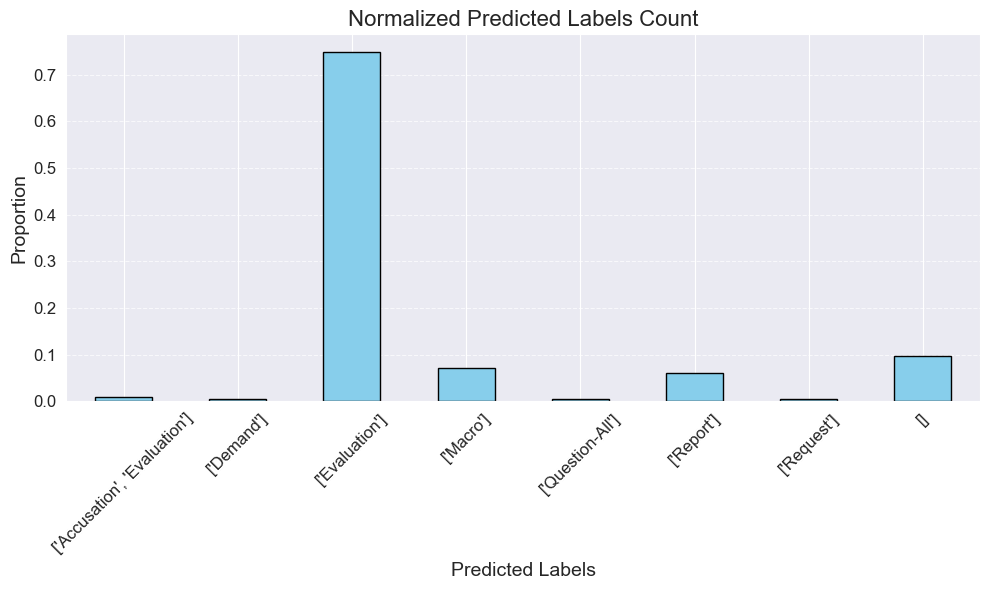

In [12]:
label_counts = result_speeches_df.groupby('predicted_labels').size()
label_counts_normalized = label_counts / label_counts.sum()

plt.figure(figsize=(10, 6))
label_counts_normalized.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Normalized Predicted Labels Count', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Proportion', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
